#**4. gyakorlat - Jackson-hálózatok**

1. Az alábbi hálózatban mindhárom szerver FIFO, a kiszolgálási rátájuk rendre $\mu_A=2.5, \mu_B=1.7, \mu_C=1.5$.

  (a) Stabil-e a hálózat?

  (b) Mekkora az egyes szerverek terheltsége?

  (c) Egy kívülről A-ba beérkező igény átlagosan mennyi időt tölt a rendszerben?
  
  (d) Mi a rendszer stacionárius eloszlása?

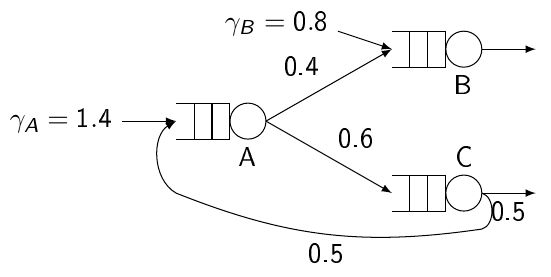

In [ ]:
import numpy as np
import numpy.linalg as npl
from IPython.display import display, Math
import sympy as sp


def npr(x, digits = 3):
  return np.round(x, digits)

In [ ]:
# (a) Stabil-e a hálózat?

# Kiszolgálási ráta
mu_A = 2.5
mu_B = 1.7
mu_C = 1.5
mu = np.array([mu_A, mu_B, mu_C])

# Kívülről érkező igények
gamma_A = 1.4
gamma_B = 0.8
gamma_C = 0
gamma = np.array([gamma_A, gamma_B, gamma_C])

# Az irányítási mátrix:
P = np.array([[0, 0.4, 0.6], [0, 0, 0], [0.5, 0, 0]])

# Egységmátrix
I = np.eye(3)

# Az érkezési ráta vektor:
lmbd = gamma @ npl.inv(I-P)
print(f"Az érkezési ráta vektor:\n")
display(sp.Matrix(npr(lmbd)).T)

# Stabilitás feltétele: lmbd_i < mu_i
print("\nStabil a rendszer?")
display(Math("\\lambda_i < \\mu_i,~~ \\forall i:"))
print((lmbd < mu).all())

Az érkezési ráta vektor:



Matrix([[2.0, 1.6, 1.2]])


Stabil a rendszer?


<IPython.core.display.Math object>

True


In [ ]:
# (b) Mekkora az egyes szerverek terheltsége?
rho = lmbd / mu
display(Math("\\rho = \\lambda / \\mu ="))
display(sp.Matrix(npr(rho)).T)

<IPython.core.display.Math object>

Matrix([[0.8, 0.941, 0.8]])

In [ ]:
# (c) Egy kívülről A-ba beérkező igény átlagosan mennyi időt tölt a rendszerben?
# A PASTA elv miatt: látogatások száma x átlagos kiszolgálási idő alapján

# Látogatások számának várható értéke:
EL = npl.inv(I-P)
print(f"Látogatások számának mátrixa (E[L]):\n")
display(sp.Matrix(npr(EL)))

# Átlagos kiszolgálási idő vektor:
T = 1 / (mu - lmbd)
print(f"\nAz átlagos kiszolgálási idő az egyes szerverekben:\n")
display(sp.Matrix(npr(T)).T)

# Átlagos rendszerben töltött idő:
print(f"\nAz átlagos rendszerben töltött idő az egyes szerverekből indulva:\n")
display(sp.Matrix(npr(EL @ T)).T)

Látogatások számának mátrixa (E[L]):



Matrix([
[1.429, 0.571, 0.857],
[  0.0,   1.0,   0.0],
[0.714, 0.286, 1.429]])


Az átlagos kiszolgálási idő az egyes szerverekben:



Matrix([[2.0, 10.0, 3.333]])


Az átlagos rendszerben töltött idő az egyes szerverekből indulva:



Matrix([[11.429, 10.0, 9.048]])

In [ ]:
# (d) Mi a rendszer stacionárius eloszlása?
# for ciklussal:
def vst1(rho, k):
  p = 1
  n = len(rho)
  for i in range(n):
    p *= (1-rho[i]) * rho[i] ** k[i]

  return p

# vektorosan:
def vst2(rho, k):
  return np.prod((1-rho) * rho ** k)

st = [1, 2, 4]
print(f"Pl. a(z) {st} állapot valószínűsége: {vst1(rho, st)}")

# A biztonság kedvéért ellenőrizzük, hogy a valószínűségek ~1-re összegződnek:
m = 30
print("\nAnnak a valószínűsége, hogy egy sorban sincs 100-nál több igény:", npr(np.sum([vst1(rho, [i, j, k]) for i in range(m) for j in range(m) for k in range(m)])))

Pl. a(z) [1, 2, 4] állapot valószínűsége: 0.0006829723590474241

Annak a valószínűsége, hogy egy sorban sincs 100-nál több igény: 0.836


In [ ]:
# Szimbolikusan is felírható ugyanez
k_A, k_B, k_C = sp.symbols('k_A,k_B,k_C')
k = np.array([k_A, k_B, k_C])

vst_sym = sp.simplify(np.prod(npr(1-rho) * npr(rho)**k))
print(f"A(z) {st} állapot valószínűsége az általános képletből: {vst_sym.subs([(k_A, st[0]), (k_B, st[1]), (k_C, st[2])])}")
sp.pprint(vst_sym)

A(z) [1, 2, 4] állapot valószínűsége az általános képletből: 0.000684764417228800
           k_A + k_C      k_B
0.00236⋅0.8         ⋅0.941   


2. Az alábbi hálózatban minden szerver M/M/1 típusú, az egyes szerverek kiszolgálási rátája rendre $\mu_A=6.0, \mu_B=2.0, \mu_C=4.0, \mu_D=3.0$. A kívülről történő érkezések rátája $\gamma_A=2.5$. Az A szerverből kimenő igények $p$ valószínűséggel a B, $1-p$ valószínűséggel a C sorába állnak be.

  (a) A $p$ paraméter mely értékeire stabil a hálózat?

  (b) Jellemezzük a D szerver érkezési folyamatát.

  (c) Számítsuk ki egy véletlen beérkező igény átlagos rendszerben töltött idejét a $p$ paraméter függvényében.

  (d) A $p$ paraméter mely értékére lesz az átlagos rendszerben töltött idő minimális?




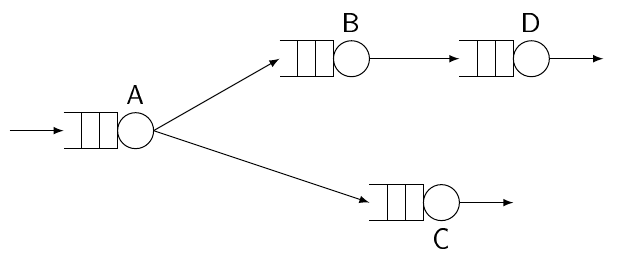

In [ ]:
# (a) A p paraméter mely értékeire stabil a hálózat?

# A külső érkezési intenzitások vektora
gamma = sp.Matrix([[2.5, 0, 0, 0]])

# A kiszolgálási intenzitások vektora
mu = sp.Matrix([[6, 2, 4, 3]])

p = sp.symbols('p')

# Az irányítási mátrix
P = sp.Matrix([[0, p, 1-p, 0], [0, 0, 0, 1], [0, 0, 0, 0], [0, 0, 0, 0]])

I = sp.eye(4)

# A forgalmi egyenletek kézzel is számolhatók egyenként, de az általános megoldás továbbra is működik
EL = (I-P) ** -1

print("E[L] az aciklikus hálózatra:\n")
display(EL)

lmbd = gamma * EL
print("\nAz érkezési intenzitások vektora:\n")
display(lmbd)

# A hálózat stabil ha lambda < mu
p_stab = sp.reduce_inequalities([
    p >= 0,
    p <= 1,
    lmbd[0] < mu[0],
    lmbd[1] < mu[1],
    lmbd[2] < mu[2],
    lmbd[3] < mu[3]
    ],[p])

print("\nA rendszer stabil, ha:\n")
display(p_stab)


E[L] az aciklikus hálózatra:



Matrix([
[1, p, 1 - p, p],
[0, 1,     0, 1],
[0, 0,     1, 0],
[0, 0,     0, 1]])


Az érkezési intenzitások vektora:



Matrix([[2.5, 2.5*p, 2.5 - 2.5*p, 2.5*p]])


A rendszer stabil, ha:



(p < 0.8) & (0 <= p)

In [ ]:
# (b) Jellemezzük a D szerver érkezési folyamatát. (Lásd diasor)

In [ ]:
# (c) Számítsuk ki egy véletlen beérkező igény átlagos rendszerben töltött idejét a p paraméter függvényében.

# Átlagos kiszolgálási idő az egyes szerverekben
ET = sp.Matrix([1/(mu - lmbd)[i] for i in range(4)])

# Átlagos rendszerben töltött idő a rendszerben töltött idő a különböző szerverekbe érkezés után
ETt = EL * ET

# Mivel csak az A szerverbe érkeznek kívülről igények ezért...
print("\nAz átlagos rendszerben töltött idő:\n")
ETt[0]


Az átlagos rendszerben töltött idő:



p/(3 - 2.5*p) + p/(2 - 2.5*p) + (1 - p)/(2.5*p + 1.5) + 0.285714285714286

In [ ]:
# (d) A p paraméter mely értékére lesz az átlagos rendszerben töltött idő minimális?

# Ilyen egyszerű függvényt a Sympy segítségével is optimalizálhatunk deriváltak alapján
# Ehelyett most optimalizáljuk numerikusan (a probléma természete miatt tudjuk, hogy csak egy minimum van)
from scipy.optimize import minimize

f_ET = sp.lambdify(p, ETt[0])

#
p_0 = 0
print(f"A minimum p={npr(minimize(f_ET, p_0).x)} értékénél található")

A minimum p=[0.141] értékénél található


3. Az alábbi zárt hálózatban két igény kering. Az A szerver M/M/1, kiszolgálási rátája $\mu_A=1.0$, a B szerver szintén M/M/1 típusú, $\mu_B$=2.0.

  (a) Mik a lehetséges állapotok?
  
  (b) Írjuk fel a teljes rendszer generátorát, és az alapján számítsuk ki a stacionárius eloszlást.

  (c) Számítsuk ki a stacionárius eloszlást a Gordon-Newell tétel alapján.

  (d) Adjuk meg az egyes szerverek terheltségét.

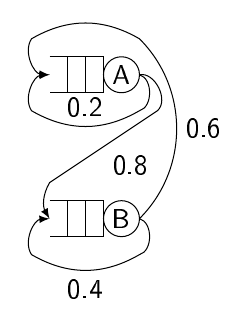

In [ ]:
# (a) Mik a lehetséges állapotok? (Lásd diasor)

In [ ]:
# (b) Írjuk fel a teljes rendszer generátorát, és az alapján számítsuk ki a stacionárius eloszlást.
mu_A = 1.0
mu_B = 2.0
p_AA = 0.2
p_AB = 0.8
p_BA = 0.6
p_BB = 0.4

# Ha az állapotokat a 0: (2,0), 1: (1,1), 2: (0,2) sorrendben számozzuk, az átmeneti ráták az alábbiak
#q00: (2,0)-ból (2,0)-ba is "mehetünk", de ez Markov-lánc értelemben nem átlépés (hasonlóan q11 és q22 esetén)
q01 = mu_A * p_AB
#0 -> 2 átlépés nem lehetséges
q02 = 0
q10 = mu_B * p_BA
q12 = mu_A * p_AB
#2 -> 0 átlépés nem lehetséges
q20 = 0
q21 = mu_B * p_BA

Q = np.array([[0, q01, q02], [q10, 0, q12], [q20, q21, 0]])
Q -= np.diag(np.sum(Q, axis=1))
print("Q=\n")
display(sp.Matrix(Q))

Qv = Q.T
Qv[0, :] = np.ones(3)
b = np.array([1, 0, 0])
vst_Q = npl.solve(Qv, b)
print("\nvst=\n")
display(sp.Matrix(npr(vst_Q)).T)

Q=



Matrix([
[-0.8,  0.8,  0.0],
[ 1.2, -2.0,  0.8],
[ 0.0,  1.2, -1.2]])


vst=



Matrix([[0.474, 0.316, 0.211]])

In [ ]:
# (c) Számítsuk ki a stacionárius eloszlást a Gordon-Newell tétel alapján.

# Az irányítási mátrix
P = sp.Matrix([[0.2, 0.8], [0.6, 0.4]])

lmbd_A, lmbd_B = sp.symbols("lambda_A,lambda_B")
lmbd = sp.Matrix([lmbd_A, lmbd_B])
mu = sp.Matrix([mu_A, mu_B])

# A forgalmi egyenletek 0-ra rendezve
eq1 = (P.T * lmbd)[0] - lmbd_A
eq2 =  (P.T * lmbd)[1] - lmbd_B

# A normalizáló egyenlet 0-ra rendezve
norm = (lmbd[0]/mu[0])**2 + (lmbd[0]/mu[0]) * (lmbd[1]/mu[1]) + (lmbd[1]/mu[1])**2 - 1

# Egyenletrendszerbe foglalva
sol = sp.solve([eq1, eq2, norm], [lmbd_A, lmbd_B], dict=True)

print("Az érkezési intenzitások a Gordon-Newell tétel alapján:\n", sol)

# Ebből a nemnegatív megoldás értelmes
psol = sol[1]

lmbd_Av = lmbd_A.subs(lmbd_A, psol[lmbd_A])
lmbd_Bv = lmbd_B.subs(lmbd_B, psol[lmbd_B])



# Innen a stacionárius eloszlás kiszámolható:
def vst(k_A, k_B):
  return (lmbd_Av / mu_A)**k_A * (lmbd_Bv / mu_B)**k_B

print("\nA Gordon-Newell tétel alapján a stacionárius valószínűségek:")
print(f"vst(2,0)) = {vst(2,0)}")
print(f"vst(1,1)) = {vst(1,1)}")
print(f"vst(0,2)) = {vst(0,2)}")


Az érkezési intenzitások a Gordon-Newell tétel alapján:
 [{lambda_A: -0.688247201611685, lambda_B: -0.917662935482247}, {lambda_A: 0.688247201611685, lambda_B: 0.917662935482247}]

A Gordon-Newell tétel alapján a stacionárius valószínűségek:
vst(2,0)) = 0.473684210526316
vst(1,1)) = 0.315789473684211
vst(0,2)) = 0.210526315789474


In [ ]:
# (d) Adjuk meg az egyes szerverek terheltségét.
rho_A = lmbd_Av / mu_A
rho_B = lmbd_Bv / mu_B
display(Math("\\rho_A = \\lambda_A / \\mu_A="))
print(rho_A,"\n")
display(Math("\\rho_B = \\lambda_B / \\mu_B="))
print(rho_B)


4. Az alábbi hálózatban az A szerver M/M/2 típusú, egy szál kiszolgálási rátája $\mu_A=2$; a B és C szerverek M/M/1 típusúak, a kiszolgálási rátájuk rendre $\mu_B=3, \mu_C=4$; a D és E szerverek M/M/$\infty$ típusúak, egy szál kiszolgálási rátája $\mu_D=\mu_E=1$.

  A kívülről történő érkezési ráta $\gamma_A=3$.

  Az A szerverből egy kiszolgált igény $0.6$ valószínűséggel a B, $0.4$ valószínűséggel a D felé továbbítódik. A C szerverből egy kiszolgált igény $0.8$ valószínűséggel az E szerver felé továbbítódik, $0.2$ valószínűséggel elhagyja a rendszert. Az E szerverből egy igény $0.3$ valószínűséggel az A szerver felé továbbítódik, $0.7$ valószínűséggel pedig elhagyja a rendszert.

  (a) Stabil-e a hálózat?

  (b) Mekkora az egyes szerverek terheltsége?

  (c) Egy igény átlagosan mennyi időt tölt a rendszerben?
  

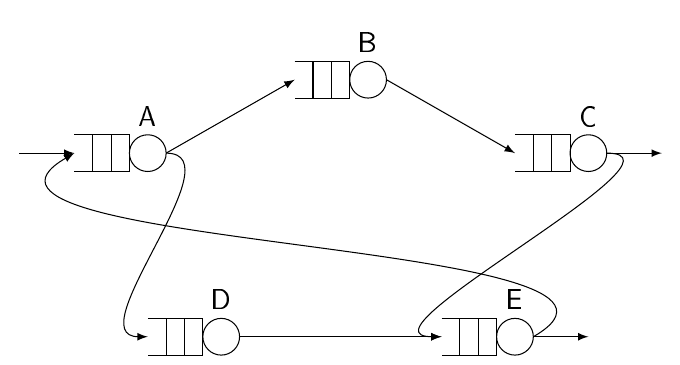